In [1]:
from utils.data_handling import *
from utils.sensor_optimisation import *
from parameters import *
import GPy

In [2]:
parameters['i_end'] = 100
parameters

{'i_start': 0,
 'i_end': 100,
 'crop': ((-5, 5), (-5, 5), (0, 20)),
 'field_name': 'TracerBackground',
 'cov_method': 'sample'}

In [21]:
loaded = initial_load_data(parameters, recompute=False)
ref_vtu, data_df, loc_df, time_df = loaded

100%|██████████| 1/1 [00:00<00:00,  4.43it/s]

### Loading files from original VTU
==> Import vtu files from 0 to 0
==> Cropping vtu files to ((-5, 5), (-5, 5), (0, 20))
Number of Locations after cropping :  291
==> Loading from : ../data/temp_data/cache_0_100_((-5, 5), (-5, 5), (0, 20))/loc_TracerBackground.pkl
==> Loading from : ../data/temp_data/cache_0_100_((-5, 5), (-5, 5), (0, 20))/time_TracerBackground.pkl
==> Loading from : ../data/temp_data/cache_0_100_((-5, 5), (-5, 5), (0, 20))/data_TracerBackground.pkl


In [42]:
# Data for the regression
t = 100
X = loc_df.values[:,0:2]
Y = data_df.values[:,t].reshape(-1,1)
X.shape

(291, 2)

In [37]:
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)
m = GPy.models.GPRegression(X,Y,kernel)
m.likelihood.variance = 0.01


 /home/aml718/anaconda3/envs/project/lib/python3.6/site-packages/GPy/core/gp.py:87: UserWarning:Your kernel has a different input dimension 1 then the given X dimension 2. Be very sure this is what you want and you have not forgotten to set the right input dimenion in your kernel


In [38]:
m

GP_regression.,value,constraints,priors
rbf.variance,1.0,+ve,
rbf.lengthscale,1.0,+ve,
Gaussian_noise.variance,0.01,+ve,


AttributeError: 'dict' object has no attribute 'figure'

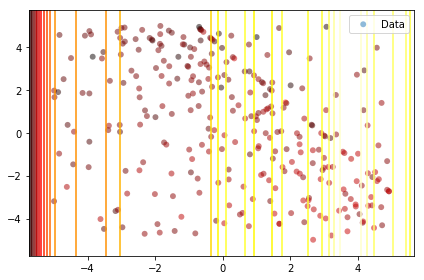

In [43]:
fig = m.plot()
GPy.plotting.show(fig, filename='basic_gp_regression_notebook_2d')
